**Import Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection**

In [2]:
# Install dependencies for dataset:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "insurance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mirichoi0218/insurance",
  file_path,
)

print("First 5 records:", df.head())

/tmp/ipython-input-591572374.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 54.3k/54.3k [00:00<00:00, 51.8MB/s]

First 5 records:    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
#Loading data into Pandas df

insurance_df = pd.DataFrame(data=df)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Data Analysis**

In [4]:
#Dataset dimensions
insurance_df.shape

(1338, 7)

In [5]:
# getting some informations about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Insights about data:
1. Sex, Smoker, Region are categorical features
2. There are no null values in any column.
3. The dataset is not very large, it is around 1400 rows

In [7]:
#Statistics for non-categorical fields
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-3035479509.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['age']) #distribution plot


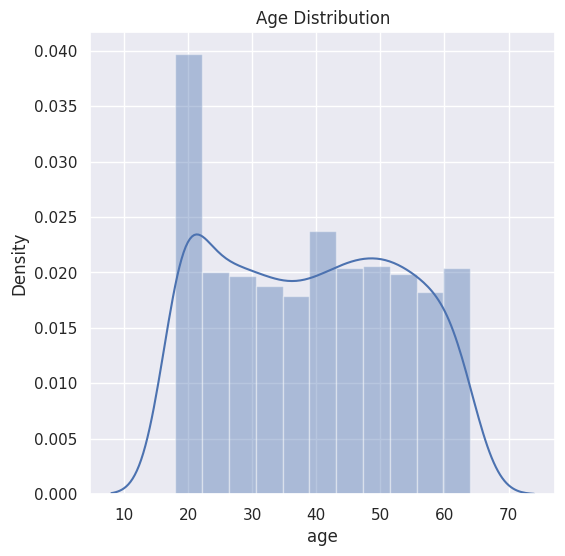

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['age']) #distribution plot
plt.title('Age Distribution')
plt.show()

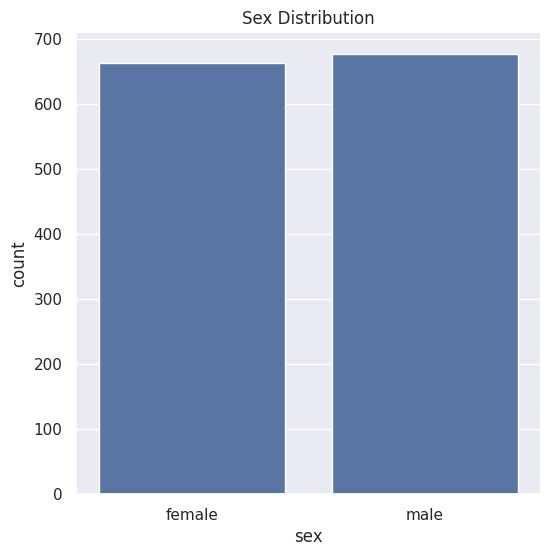

In [9]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_df)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_df['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

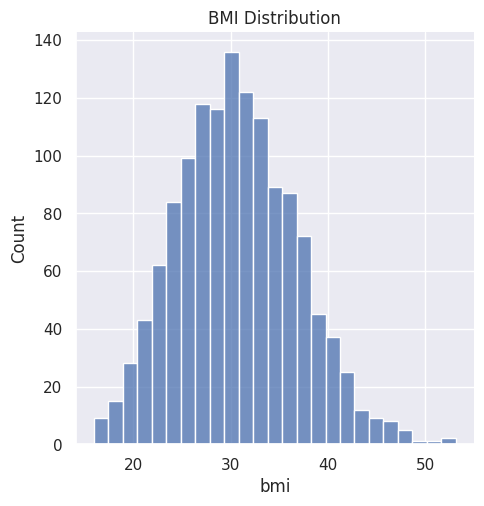

In [11]:
plt.figure(figsize=(6,6))
sns.displot(insurance_df['bmi'])
plt.title("BMI Distribution")
plt.show()

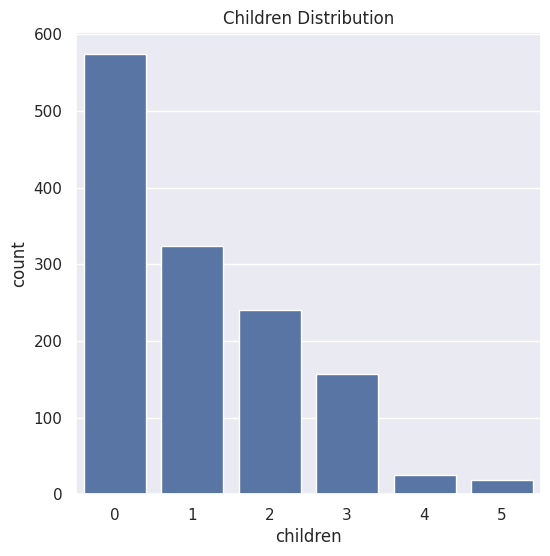

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(data=insurance_df, x="children")
plt.title("Children Distribution")
plt.show()

In [13]:
insurance_df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


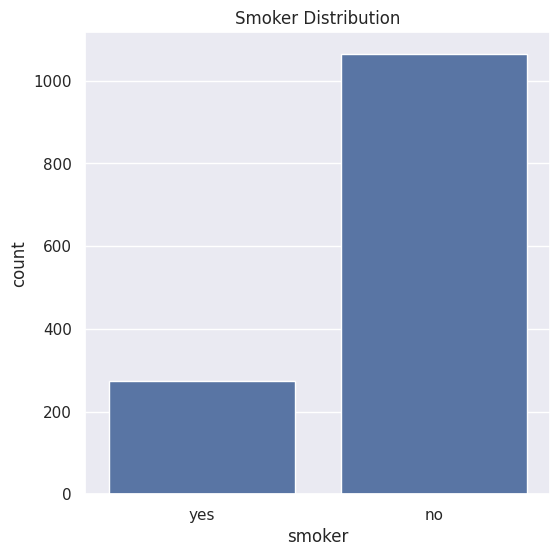

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(data=insurance_df, x="smoker")
plt.title("Smoker Distribution")
plt.show()

In [15]:
insurance_df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


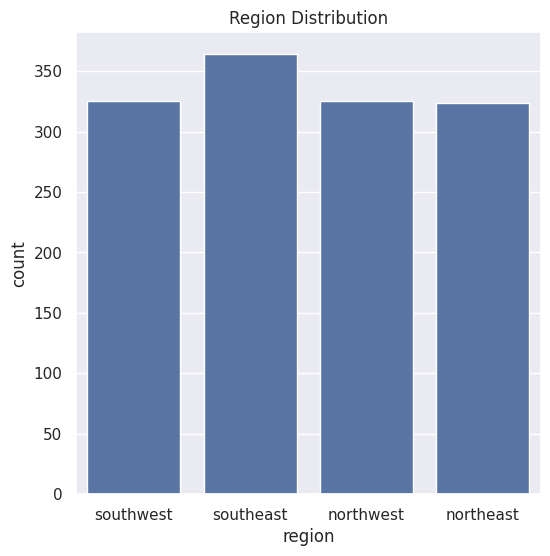

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(data=insurance_df, x="region")
plt.title("Region Distribution")
plt.show()

In [17]:
insurance_df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-848087075.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['charges'])


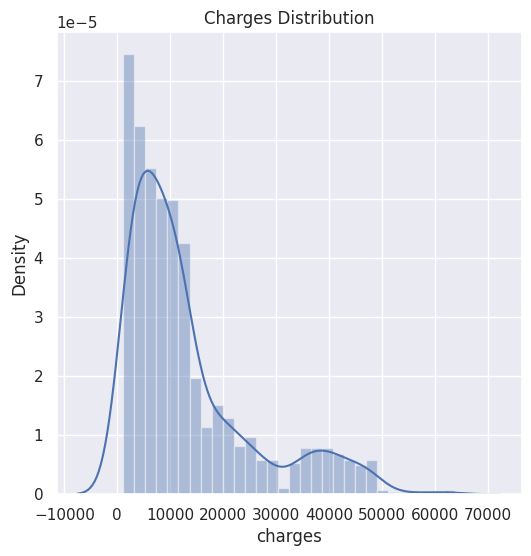

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['charges'])
plt.title('Charges Distribution')
plt.show()

In [39]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Based on the correlation matrix:

*   age → 0.299 → weak positive correlation with charges. Older people slightly tend to have higher charges.
*  bmi → 0.198 → weak positive correlation on charges. Higher BMI is slightly associated with higher charges.
*   children → 0.068 → very weak correlation. Number of children doesn’t strongly influence charges.


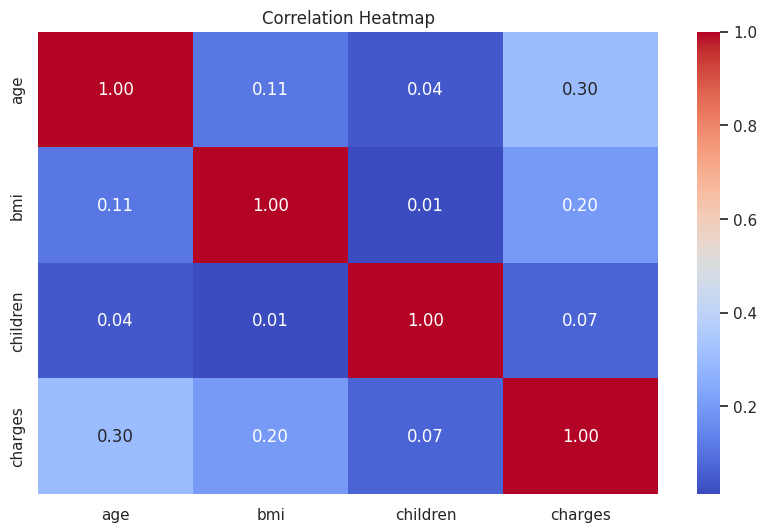

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

There are no strong linear relationships between features or between features and charges.
This suggests that charges are influenced by a combination of features or possibly nonlinear relationships, not just any single feature.

**Data Pre-Processing**

Encoding categorical variables

In [19]:
# encoding sex column
insurance_df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding 'smoker' column
insurance_df.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# encoding 'region' column
insurance_df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

/tmp/ipython-input-2624061006.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_df.replace({'sex':{'male':0, 'female':1}}, inplace=True)
/tmp/ipython-input-2624061006.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_df.replace({'smoker':{'yes':0, 'no':1}},inplace=True)
/tmp/ipython-input-2624061006.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futu

In [20]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Features Processing - *charges* is the target variable

In [21]:
X = insurance_df.drop(columns='charges', axis=1)
Y = insurance_df['charges']

Splitting data into train and test dataset

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
#20% of the dataset is used as test data
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [24]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [25]:
training_data_prediction = regressor.predict(X_train)

In [42]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value for the training data: ', r2_train)
mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean Absolute Error in the training data: ", mae)

R squared value for the training data:  0.751505643411174
Mean Absolute Error in the training data:  4150.500304883777


**Evaluation on Test Data**

In [43]:
test_data_prediction = regressor.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error in the test data: ", mae)

R squared value :  0.7447273869684076
Mean Absolute Error in the test data:  4267.213826730733


R-squared value is closer to 1, i.e., the model can adequately capture the variance in data.

**Random Forest Regressor**

In [44]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [46]:
training_data_prediction = regressor.predict(X_train)
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value for the training data: ', r2_train)
mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean Absolute Error in the training data: ", mae)

R squared value for the training data:  0.9772612152330278
Mean Absolute Error in the training data:  1009.7700596514948


Feature Importances

In [49]:
importances = pd.Series(regressor.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

,0
smoker,0.627286
bmi,0.208106
age,0.124708
children,0.019034
region,0.014945
sex,0.005921


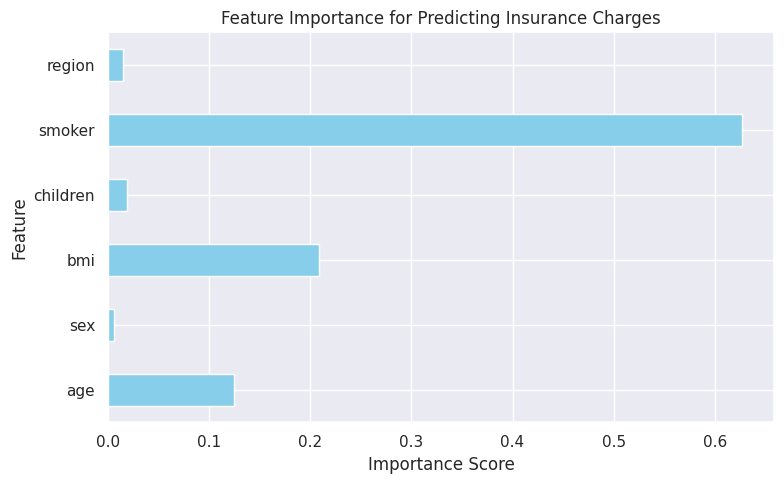

In [50]:
plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance for Predicting Insurance Charges")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Based on feature importance from the Random Forest model, smoking status, BMI, and age are the most influential factors in predicting insurance charges.

**Evaluation on Test Data**

In [47]:
test_data_prediction = regressor.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error in the test data: ", mae)

R squared value :  0.8379198591254433
Mean Absolute Error in the test data:  2752.505484245075


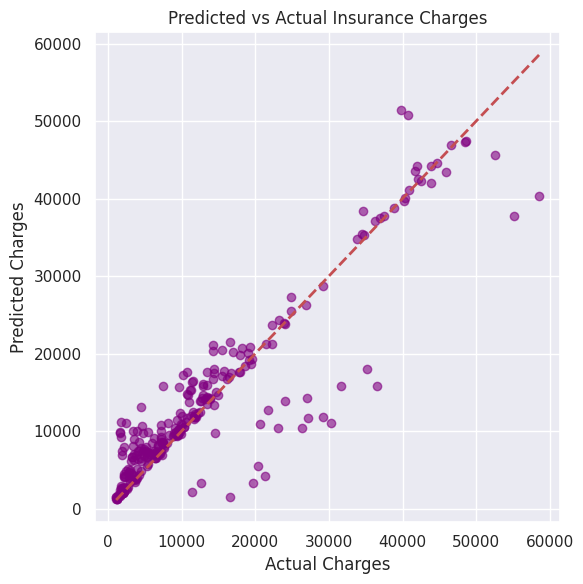

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, test_data_prediction, alpha=0.6, color='purple')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)  # y=x line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Insurance Charges")
plt.tight_layout()
plt.show()

Given the weak linear correlations in the data, Random Forest is doing well here because it captures nonlinearities and interactions that simple linear regression cannot.